# BERTopic

In [1]:
import sys
sys.path.insert(0, '..')
from utils.preprocesamiento import df_to_list

In [2]:
import pandas as pd
from utils.cargar import df_caso
from utils.preprocesamiento import process_df

op_left, op_right = 'Priorizar criterios técnicos', 'Priorizar plazos'

caso = 'alicia'
df = df_caso(caso)

df = process_df(df,'comment','sel',verbose=True)

train_indices = pd.read_csv('../utils/splits/train_indices_{}.csv'.format(caso), header=None)[0].tolist()
test_indices = pd.read_csv('../utils/splits/test_indices_{}.csv'.format(caso), header=None)[0].tolist()
print("Partición train-test cargada")

df_train = df.iloc[train_indices]
df_test = df.iloc[test_indices]

80 rows found with non string elements for column comment (0.65%)
Deleting 2326 columns for which max target value is over 7 (18.76%)
9991 available rows after processing
Partición train-test cargada


Guardando la partición train-test

In [3]:
from utils.preprocesamiento import StemmerTokenizer

tokenizador = StemmerTokenizer(stem=False,rmv_punctuation=True)

docs_train = df_to_list(df_train,'comment',tokenizador)
docs_test = df_to_list(df_test, 'comment',tokenizador)

## BERTopic algorithm

In [4]:
from IPython.display import Image, display
display(Image(url='https://maartengr.github.io/BERTopic/algorithm/modularity.svg'))

In [5]:
%%capture
from bertopic import BERTopic

In [6]:
model = BERTopic(language="spanish",min_topic_size=10,nr_topics=25,calculate_probabilities=True)

In [7]:
%%time
topics, probs = model.fit_transform(docs_train)

CPU times: user 9min 2s, sys: 4.77 s, total: 9min 7s
Wall time: 1min 43s


In [8]:
model.get_topic_freq().head(5)

,Topic,Count
2,0,2205
0,-1,1817
1,1,1639
5,2,1623
12,3,301


In [9]:
model.get_topic(0)[:10]

[('alicia', 0.055997532125891654),
 ('proyecto', 0.027613617664929542),
 ('debería', 0.024718072210527523),
 ('debe', 0.021245125746261757),
 ('si', 0.01969507071255016),
 ('usuarios', 0.018354414816838135),
 ('priorizar', 0.017539647980836105),
 ('ser', 0.016638759207639478),
 ('cumplir', 0.015965821081827564),
 ('entregar', 0.015753234360064868)]

Topicos para algunos documentos

In [10]:
for i, t in enumerate(model.topics_[:10]):
    print('Tópico {}:\ttexto: {}'.format(t,docs_train[i]))

Tópico -1:	texto: entrega producto defectuoso cumple ética ingeniero
Tópico 1:	texto: Creo reputación manchada ser transparente sino contrario podría ser mejor solución
Tópico 0:	texto: Alicia debería ser transparente dicho anteriormente ser transparente parte personalidad además puede justificar buena manera salir éxito
Tópico 1:	texto: especificaciones técnicas deberían ser transparentes evitar problemas largo plazo
Tópico -1:	texto: Si finalizó proyecto entregado falencias importante ser responsable riesgos pueda generar largo plazo pesar seguros impedirán funcionalidad si alguien va usar producto final debe consciente acabado pensó principio conozca contexto globalmente sepa cómo reaccionar caso próximos errores capaz discernir cuenta próximas mejorar producto necesita vista terminado criterios requerían principio A parte punto vista ocultar verdad consecuente valores trabajadora enseñó años formación profesional conscientes contingencia mundial importante ser responsable consecuen

### Inferencia en conjunto test

In [11]:
string = 'Aun considero necesario resguardar mas tradiciones identitarias embargo producir alimento podría ayudar muchas personas entonces debería existir diálogo ambas partes llegar mejor solución'

model.transform([string])

([11],
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]]))

In [12]:
output = model.transform(df_to_list(df_test.iloc[:3],'comment',tokenizador))

Imprimiendo los embeddings

In [13]:
output[1]

array([[1.87916188e-03, 2.38280628e-03, 1.76686414e-02, 1.82538608e-03,
        4.38205821e-03, 8.31674390e-03, 1.00143350e-02, 1.13198248e-02,
        1.26395943e-02, 4.69732235e-03, 7.18836381e-03, 4.22456353e-03,
        2.13724015e-03, 6.65643046e-03, 3.69324017e-03, 5.49692278e-03,
        9.10063925e-03, 3.03759363e-03, 2.61134155e-03, 2.29190757e-03,
        3.48981463e-03, 2.07273059e-03, 1.87497941e-03, 2.78669806e-03],
       [1.74043731e-03, 1.68670454e-03, 5.98492206e-02, 1.52447637e-03,
        1.14131304e-02, 4.53612925e-02, 1.84370773e-01, 2.19540468e-02,
        5.47591717e-02, 9.66280868e-03, 4.77284870e-02, 1.35467480e-02,
        5.36133354e-03, 1.43408737e-02, 1.15589284e-02, 2.84534352e-02,
        4.37142776e-03, 1.70879438e-02, 1.86844991e-02, 7.52909467e-03,
        6.28467304e-03, 2.59341898e-03, 5.86490895e-03, 4.14375956e-02],
       [9.98042332e-01, 4.44198855e-05, 2.94546404e-04, 4.83064209e-05,
        8.22087927e-05, 1.21847516e-04, 1.24631640e-04, 1.2965

In [14]:
output[0]

[-1, 6, 0]

Visualización

In [15]:
model.visualize_topics()

Podemos relacionar tópicos con palabras en específico

In [16]:
target = 'integridad'

topic_num = 5

similar_topics, similarity = model.find_topics(target, top_n=topic_num)
similar_topics

[19, 20, 14, 16, 1]

In [17]:
similarity

[0.6048111494515724,
 0.5676433600112081,
 0.5439172316140494,
 0.5304554359827586,
 0.5038363435053411]

In [18]:
from TM_utils import get_table_top_topics
from utils.exploracion import print_table_md

print("Tópicos relevantes para concepto: {}".format(target))

headers, data = get_table_top_topics(model,similar_topics,similarity,max_w=5)
print_table_md(headers, data)

Tópicos relevantes para concepto: integridad


| Tópico | Probabilidad | Palabra 1 | Palabra 2 | Palabra 3 | Palabra 4 | Palabra 5 |
| --- | --- | --- | --- | --- | --- | --- |
| 19 | 0.6048111494515724 | debe | cumplir | seamos | responsabilidaded | conclocprometidp |
| 20 | 0.5676433600112081 | seguridad | técnicos | criterios | importante | mayores |
| 14 | 0.5439172316140494 | mismo | acordo | idem | lo | anteriores |
| 16 | 0.5304554359827586 | ética | ético | trabajo | hecho | éticos |
| 1 | 0.5038363435053411 | reputación | transparencia | ser | transparente | mantener |


### Analizando correlaciones con selección de postura

Por el momento binarizando la postura

In [19]:
df_test.loc[(df_test['sel']==2) | (df_test['sel']==3),'sel'] = 1
df_test.loc[(df_test['sel']==4) | (df_test['sel']==5),'sel'] = 6

In [20]:
output_sel1 = model.transform(df_to_list(df_test[df_test['sel']==1],'comment',tokenizador))

In [21]:
output_sel6 = model.transform(df_to_list(df_test[df_test['sel']==6],'comment',tokenizador))

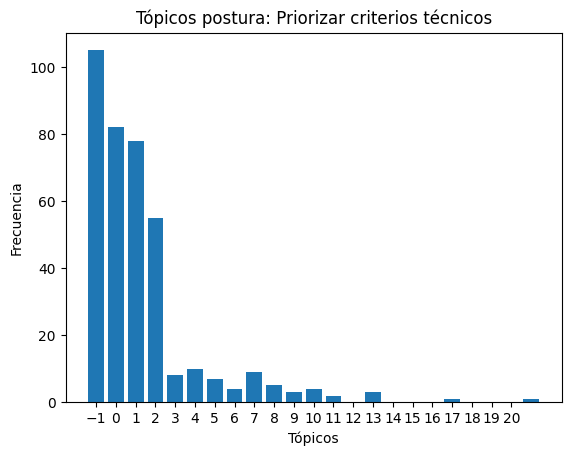

In [22]:
import matplotlib.pyplot as plt

def plot_frecuencies(input_list,label):
    frequency_dict = {}
    for element in input_list:
        if element in frequency_dict:
            frequency_dict[element] += 1
        else:
            frequency_dict[element] = 1
    counts = frequency_dict

    # Switching to the OO-interface. You can do all of this with "plt" as well.
    fig, ax = plt.subplots()

    keys = counts.keys()
    values = counts.values()

    plt.bar(keys, values)

    custom_ticks = list(range(-1,max(input_list)))
    plt.xticks(custom_ticks)

    plt.xlabel('Tópicos')
    plt.ylabel('Frecuencia')
    plt.title('Tópicos postura: {}'.format(label))

    plt.show()

plot_frecuencies(output_sel1[0],label=op_left)

In [23]:
def get_top_k_topics(input_list,k=5):

    frequency_dict = {}
    for element in input_list:
        if element in frequency_dict:
            frequency_dict[element] += 1
        else:
            frequency_dict[element] = 1

    # Sort the dictionary items by their values in descending order
    sorted_items = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)

    # Get the top 5 keys with the largest values
    top_k_keys = [item[0] for item in sorted_items[:k]]
    top_k_values = [item[1] for item in sorted_items[:k]]

    top_k_values = [elem/len(input_list) for elem in top_k_values]

    return top_k_keys, top_k_values

top_5_keys, top_5_values = get_top_k_topics(output_sel1[0])

print("Tópicos relevantes para postura: {}".format(op_left))

headers, data = get_table_top_topics(model,top_5_keys,top_5_values,max_w=5)
print_table_md(headers, data)

Tópicos relevantes para postura: Priorizar criterios técnicos


| Tópico | Probabilidad | Palabra 1 | Palabra 2 | Palabra 3 | Palabra 4 | Palabra 5 |
| --- | --- | --- | --- | --- | --- | --- |
| -1 | 0.27851458885941643 | proyecto | si | entregar | plazo | plazos |
| 0 | 0.21750663129973474 | alicia | proyecto | debería | debe | si |
| 1 | 0.20689655172413793 | reputación | transparencia | ser | transparente | mantener |
| 2 | 0.14588859416445624 | proyecto | criterios | técnicos | usuario | usuarios |
| 4 | 0.026525198938992044 | acuerdos | cumplir | condiciones | acuerdo | contexto |


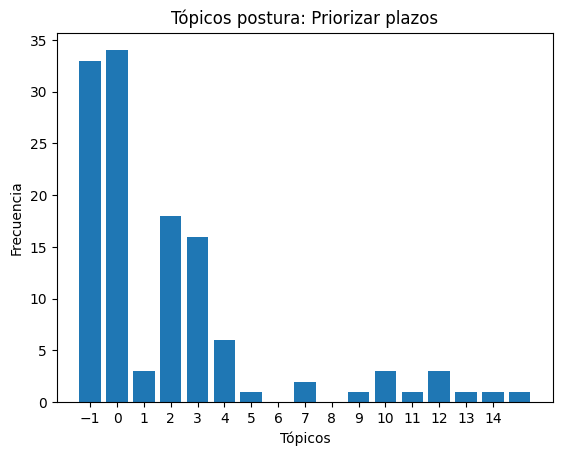

In [24]:
plot_frecuencies(output_sel6[0],label=op_right)

In [25]:
top_5_keys, top_5_values = get_top_k_topics(output_sel6[0])

print("Tópicos relevantes para postura: {}".format(op_right))

headers, data = get_table_top_topics(model,top_5_keys,top_5_values,max_w=5)
print_table_md(headers, data)

Tópicos relevantes para postura: Priorizar plazos


| Tópico | Probabilidad | Palabra 1 | Palabra 2 | Palabra 3 | Palabra 4 | Palabra 5 |
| --- | --- | --- | --- | --- | --- | --- |
| 0 | 0.27419354838709675 | alicia | proyecto | debería | debe | si |
| -1 | 0.2661290322580645 | proyecto | si | entregar | plazo | plazos |
| 2 | 0.14516129032258066 | proyecto | criterios | técnicos | usuario | usuarios |
| 3 | 0.12903225806451613 | pandemia | contexto | acuerdos | condiciones | proyecto |
| 4 | 0.04838709677419355 | acuerdos | cumplir | condiciones | acuerdo | contexto |


### Correlaciones

In [26]:
import pandas as pd

df_test = df.iloc[test_indices]
df_test['sel'].value_counts()

arr_test = model.transform(df_to_list(df_test,'comment',tokenizador))[1]
df_topics = pd.DataFrame(arr_test, columns=['Topic{}'.format(i+1) for i in range(24)])

df_topics['sel'] = df_test['sel'].values

In [27]:
from scipy.stats import pearsonr

# Only compute pearson prod-moment correlations between feature
# columns and target column
target_col_name = 'sel'
feature_target_corr = {}
for col in df_topics:
    if target_col_name != col:
        feature_target_corr[col + '_' + target_col_name] = \
            pearsonr(df_topics[col], df_topics[target_col_name])[0]
print("Feature-Target Correlations")

for k in feature_target_corr.keys():
    print(k+': '+str(feature_target_corr[k]))

Feature-Target Correlations
Topic1_sel: 0.01981328983113764
Topic2_sel: -0.24598719440800468
Topic3_sel: -0.0009252933011267418
Topic4_sel: 0.2600203251693078
Topic5_sel: 0.06182666584222801
Topic6_sel: -0.058587393015927414
Topic7_sel: 0.021778858901748275
Topic8_sel: -0.019826289690081097
Topic9_sel: -0.01133584118877114
Topic10_sel: -0.009480930277498622
Topic11_sel: 0.013030301491493574
Topic12_sel: 0.014244490417426307
Topic13_sel: 0.08402703740570078
Topic14_sel: -0.06397726408523537
Topic15_sel: 0.02353567557548168
Topic16_sel: 0.07813748236908437
Topic17_sel: -0.07676443972972237
Topic18_sel: 0.038572621352906566
Topic19_sel: -0.0262625470027326
Topic20_sel: -0.0034736688064555933
Topic21_sel: -0.0262057690285058
Topic22_sel: -0.03027654387961139
Topic23_sel: -0.04699942963358767
Topic24_sel: -0.02804045545509754


Guardando el modelo

In [28]:
model.save("modelos/BT-{}.bertopic".format(caso))

Para cargar:

`my_model = BERTopic.load("modelos/BT-caso")`